# Orbit Distance Visualisations

Visualisations of the distance of different objects from Earth over time. Leveraging data from the NASA Horizons API (run the included get_data.py script first to generate the datasets)

In [1]:
from pathlib import Path

import matplotlib
import matplotlib.cbook as cbook
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd


matplotlib.rc("font", **{"family": "sans-serif", "size": 16})


def add_annotation(df, ax, color, name):
    name = name.replace("_", " ").title()
    last_date = df["date"].argmax()
    x = df["date"].iloc[last_date] + (df["date"].max() - df["date"].min()) * 0.02
    ax.text(
        x, max(0.05, df["distance"].iloc[last_date]), name, color=color, va="center"
    )
    return ax


def plot_orbit_distance(df, ax, color, name=None, area_factor=0.5):
    if name in {"sun", "moon"}:
        ax.plot(df["date"], df["distance"], linestyle="--", lw=1, color=color)
    else:
        df["angle"] = df["angle"].fillna(0.05)
        df["point_area"] = (df["angle"] * area_factor) ** 2
        ax = df.plot.scatter(x="date", y="distance", s="point_area", color=color, ax=ax)
    if name is not None:
        ax = add_annotation(df, ax, color, name)
    return ax


def plot_orbits(
    orbits,
    data_dir,
    start_date,
    end_date,
    fig_ax=None,
    background_color="xkcd:dark grey",
    axes_color="xkcd:light grey",
    area_factor=0.5,
):
    if fig_ax is None:
        fig, ax = plt.subplots()
    else:
        fig, ax = fig_ax
    for orbit_name, color in orbits.items():
        file_name = orbit_name.replace("/", "").replace("(", "").replace(")", "")
        file_path = Path(data_dir) / f"{file_name}_data.csv"
        df = pd.read_csv(file_path, index_col=0, parse_dates=["date"], na_values="n.a.")
        df = df[(df["date"] >= start_date) & (df["date"] < end_date)]
        plot_orbit_distance(df, ax, color, orbit_name, area_factor=area_factor)

    # styling config
    ax.set_facecolor(background_color)
    fig.set_facecolor(background_color)
    ax.spines.top.set(visible=False)
    ax.spines.right.set(visible=False)
    ax.spines.left.set(color=axes_color, linewidth=1)
    ax.spines.bottom.set(color=axes_color, linewidth=1)
    ax.tick_params(axis="x", which="both", colors=axes_color)
    ax.tick_params(axis="y", colors=axes_color)
    ax.yaxis.label.set_color(axes_color)
    ax.xaxis.label.set_color(axes_color)

    # month tick labels
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.xaxis.set_minor_formatter(dates.DateFormatter("%b"))
    for tick in ax.xaxis.get_minor_ticks():
        tick.tick1line.set_markersize(0)
        tick.tick2line.set_markersize(0)
        tick.label1.set_horizontalalignment("center")
    tick_pos = ax.get_xticks(minor=True)
    ax.set_xticks(tick_pos[1:-1], minor=True)

    ax.set_ylabel("Distance from Earth (AU)")
    ax.set_ylim(0, ax.get_ylim()[1])
    return fig, ax

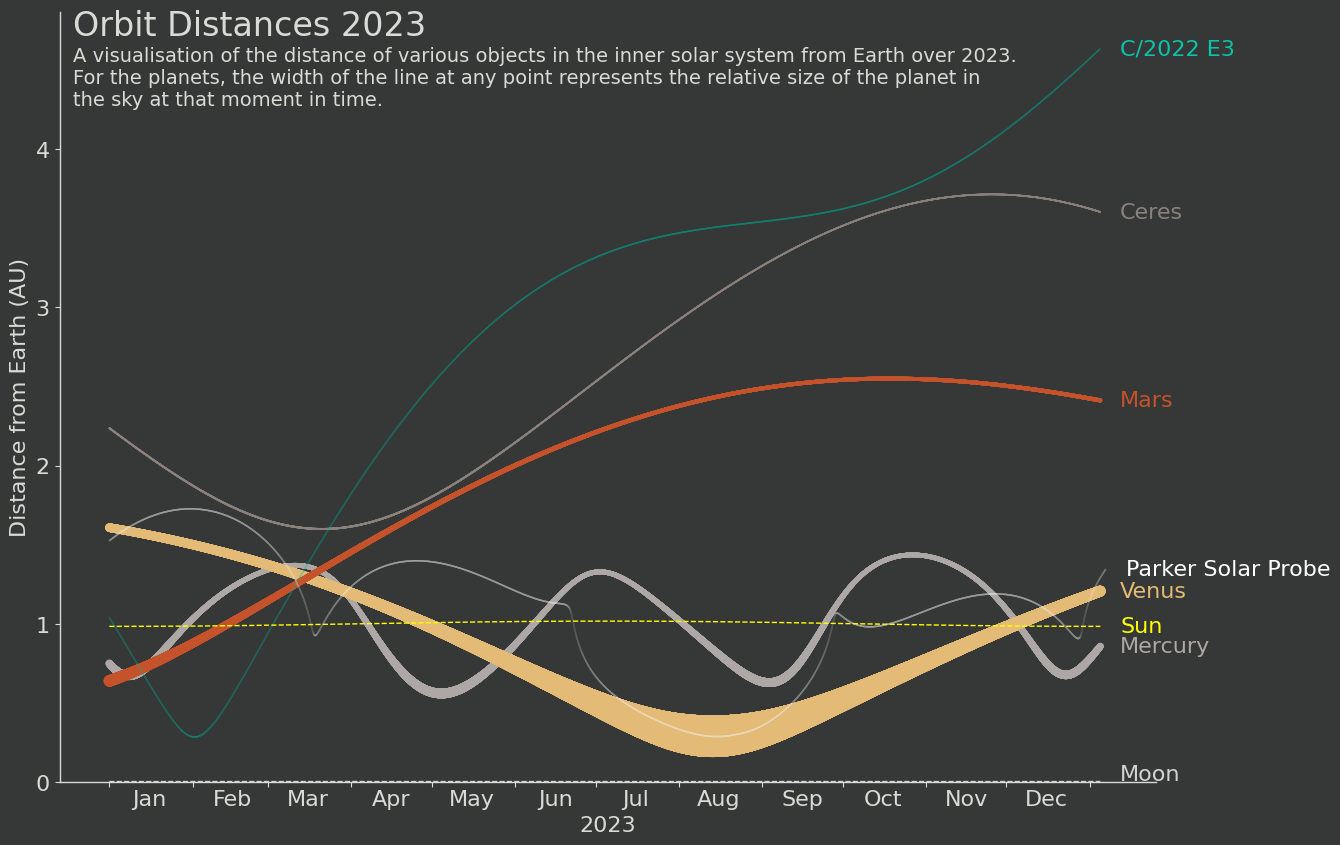

In [2]:
orbits = {
    "sun": "yellow",
    "moon": "lightgrey",
    "mercury": "#ada8a5",
    "venus": "#e3bb76",
    "mars": "#c4532b",
    "ceres": "#8b827d",
    "C/2022_E3": "#0bc3a9",
}

fig, ax = plt.subplots(figsize=(10 * 2**0.5, 10))
start_date = "2023-01-01"
end_date = "2024-01-05"
plot_orbits(orbits, "data", start_date, end_date, fig_ax=(fig, ax), area_factor=0.5)

# redoing separately for PSP as text crosses Venus at end_date
plot_orbits(
    {"parker_solar_probe": "white"},
    "data",
    start_date,
    "2024-01-07",
    fig_ax=(fig, ax),
    area_factor=0.5,
)

ax.set_xlabel("2023")
x_limits = ax.get_xlim()
ax.set_xlim(x_limits)
ax.text(
    x_limits[0] + 5, 4.72, "Orbit Distances 2023", color="xkcd:light grey", fontsize=24
)
explanation = """
A visualisation of the distance of various objects in the inner solar system from Earth over 2023. 
For the planets, the width of the line at any point represents the relative size of the planet in 
the sky at that moment in time.
"""
ax.text(x_limits[0] + 5, 4.14, explanation, color="xkcd:light grey", fontsize=14)
plt.savefig(
    "inner_object_distances_2023.png", pad_inches=0.5, bbox_inches="tight", dpi=500
)

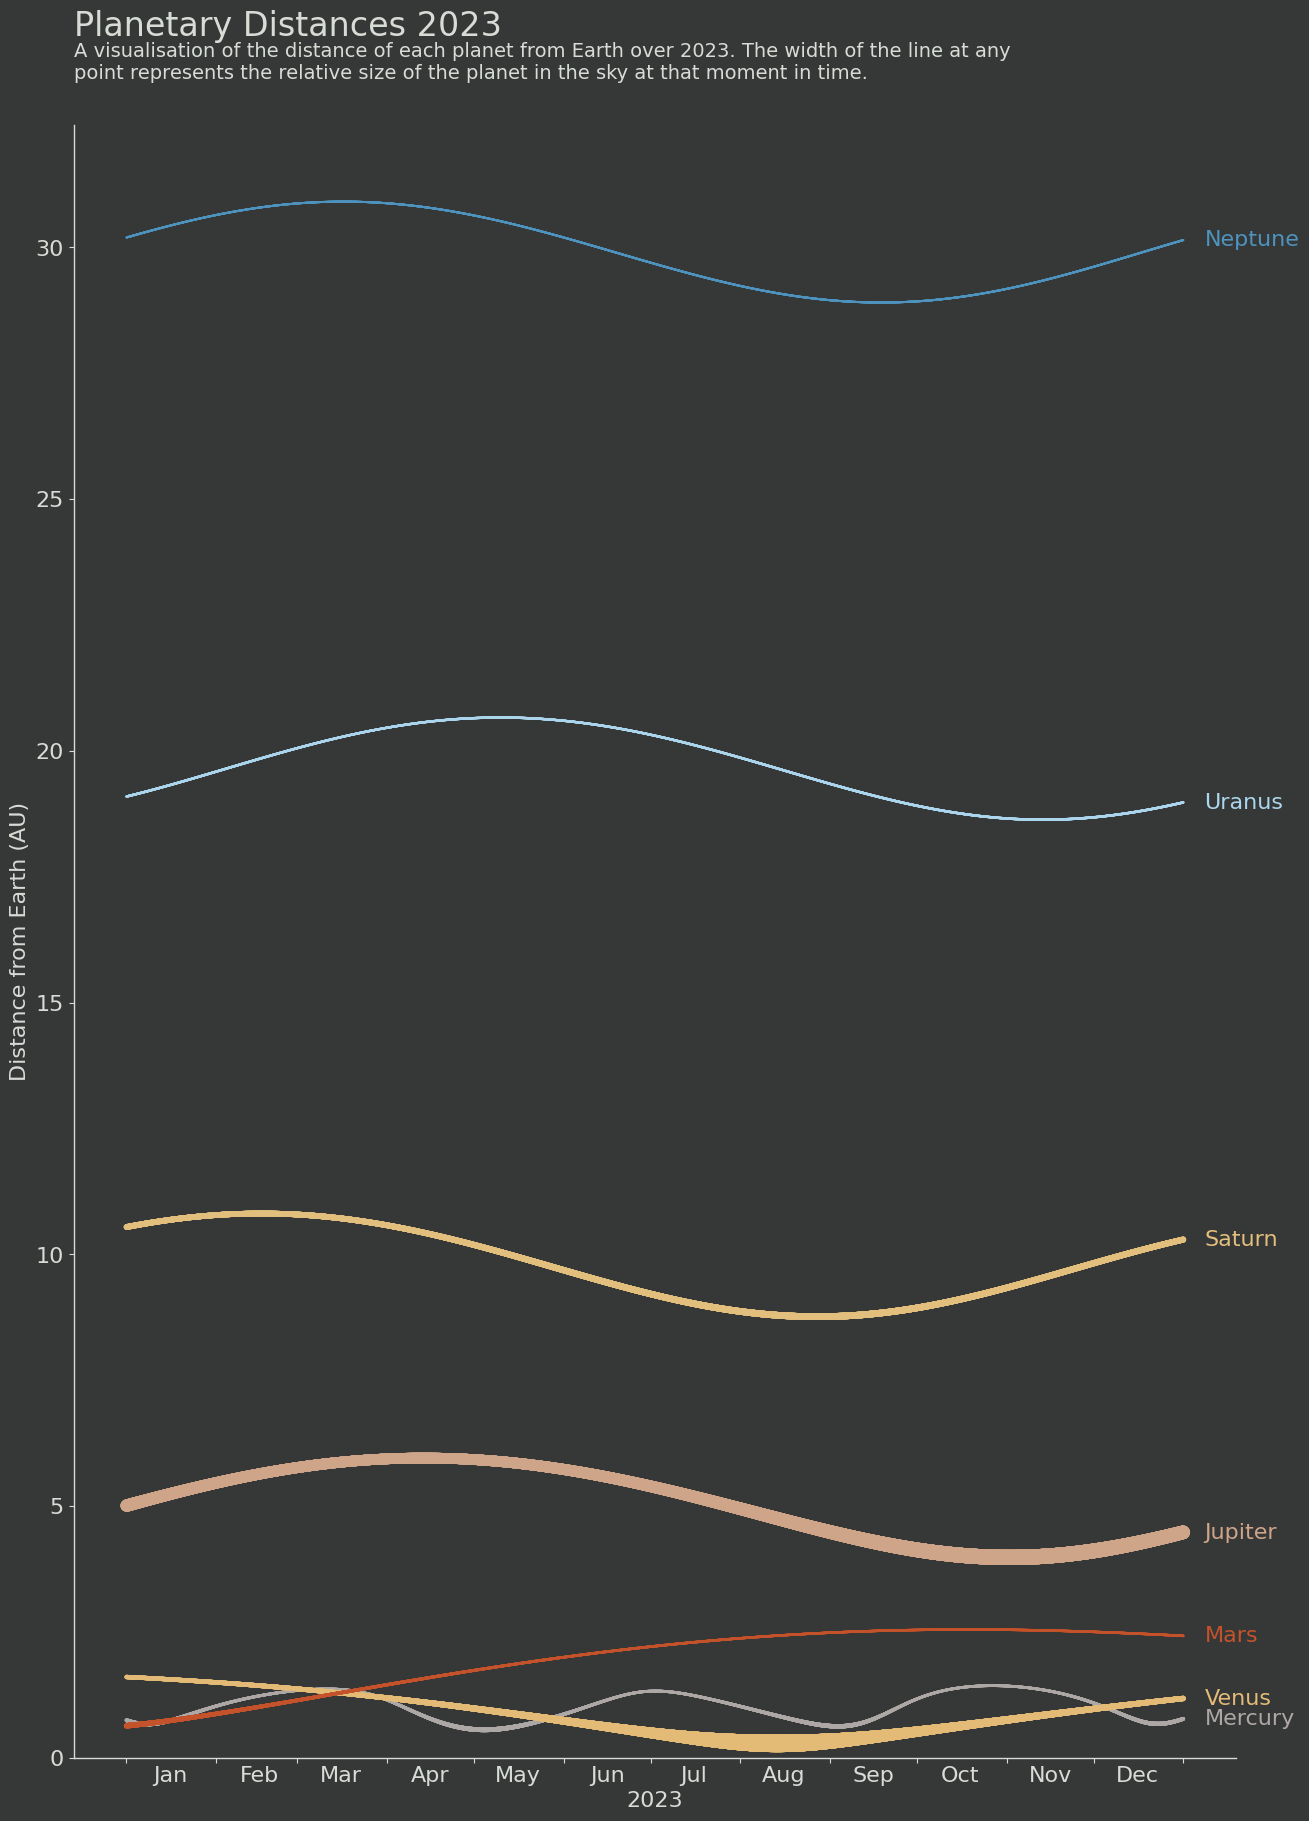

In [3]:
orbits = {
    "mercury": "#ada8a5",
    "venus": "#e3bb76",
    "mars": "#c4532b",
    "jupiter": "#cea589",
    "saturn": "#e2bf7d",
    "uranus": "#abd6ed",
    "neptune": "#4e94bf",
}


fig, ax = plt.subplots(figsize=(15, 15 * 2**0.5))
start_date = "2023-01-01"
end_date = "2024-01-01"

plot_orbits(orbits, "data", start_date, end_date, fig_ax=(fig, ax), area_factor=0.2)

ax.set_xlabel("2023")
x_limits = ax.get_xlim()
ax.text(
    x_limits[0], 34.2, "Planetary Distances 2023", color="xkcd:light grey", fontsize=24
)
explanation = """
A visualisation of the distance of each planet from Earth over 2023. The width of the line at any 
point represents the relative size of the planet in the sky at that moment in time.
"""
ax.text(x_limits[0], 32.9, explanation, color="xkcd:light grey", fontsize=14)
plt.savefig("planet_distances_2023.png", pad_inches=0.5, bbox_inches="tight", dpi=500)